In [34]:
import pandas as pd
import numpy as np

data = pd.read_csv(r"C:\Users\natha\Documents\Elecbrakes\datasets\data_logger\sway\27_11_2024_trailer_mount\dataset2\log_1.csv")

braking_matrix = []

is_braking = False

braking_vector = []
brake_duration = 0

BRAKE_THRESH = 100

for index, row in data.iterrows():
    is_braking = row['volt_condition_brake'] > 0
    
    if is_braking:
        x = row['accel_filt_x_mg']
        y = row['accel_filt_z_mg']
        brake_duration += 1
        mag = np.sqrt(x**2 + y**2)
        if mag > BRAKE_THRESH and brake_duration < 2000:
            z = x + 1j * y
            braking_vector.append(z * np.exp(mag / BRAKE_THRESH - 1)**2)
    else:
        if len(braking_vector) > 0:
            braking_matrix.append(np.array(braking_vector))
        braking_vector = []
        brake_duration = 0


In [35]:
%matplotlib ipympl

import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact
from matplotlib.widgets import Slider

def plot_row(row_index):
    # Clear the previous plot
    plt.close()
    plt.figure(figsize=(6, 6))
    
    vec = braking_matrix[row_index]
    mu = vec.mean()
    
    circle = 1000 * np.exp(1j * np.linspace(0, 2 * np.pi, 500))
    plt.plot(circle.real, circle.imag, linestyle='--', color='gray', label="Unit Circle")
    plt.quiver(0, 0, mu.real, mu.imag, color='blue')
    # Axis settings
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.grid()
    # plt.xlim(-2, 2)
    # plt.ylim(-2, 2)
    plt.show()

# Create an interactive slider to select the row
interact(plot_row, row_index=(0, len(braking_matrix) - 1));

interactive(children=(IntSlider(value=19, description='row_index', max=39), Output()), _dom_classes=('widget-i…

No such comm: c9fdd709fe23431eb10de8b401f19975
No such comm: c9fdd709fe23431eb10de8b401f19975


No such comm: 032b1c0021b948098b7be85e6bb6c9de
No such comm: 032b1c0021b948098b7be85e6bb6c9de


No such comm: 132faea12f704870abaf1f4ca921325c
No such comm: 132faea12f704870abaf1f4ca921325c


No such comm: 392b350e63104655b67afd87b35d8a4d
No such comm: 392b350e63104655b67afd87b35d8a4d


No such comm: dbaad51e0bf54d998fa2308155cfd1c9
No such comm: dbaad51e0bf54d998fa2308155cfd1c9


No such comm: b628fedc84704448bee60ff20540cbc8
No such comm: b628fedc84704448bee60ff20540cbc8
No such comm: b628fedc84704448bee60ff20540cbc8
No such comm: b628fedc84704448bee60ff20540cbc8


778.0222097815746
248.69426621175322


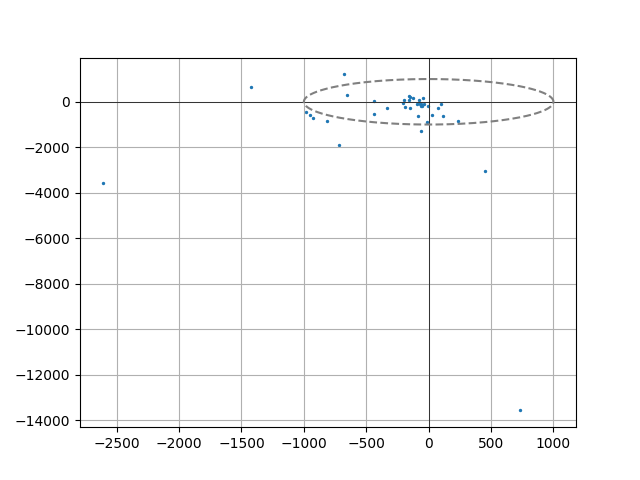

In [36]:

mu = []

for row in braking_matrix:
    mu.append(row.mean())
mu = np.array(mu)

angles = (np.angle(mu, deg=True) + 360) % 360

plt.close()
plt.figure()
values, bins, _ = plt.hist(angles, bins=360)
# plt.plot(bins[1:], values)
plt.close()

circle = 1000 * np.exp(1j * np.linspace(0, 2 * np.pi, 500))
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.plot(circle.real, circle.imag, linestyle='--', color='gray', label="Unit Circle")
plt.scatter(mu.real, mu.imag, s=2)
plt.grid()
print(np.abs(mu.mean()))
print((np.angle(mu.mean(), deg=True) + 360) % 360)